### **Project: expressEats**

***Part-3: In this Notebook we did all possible visualizations and we modelled the problem as sequence generation(receipe generation) which is a bonus!(We will explore in depth this approach in Deep Learning Course)***


***Note: We have other continued colabs, this is just part 3***

Look at our codebase below for more details

### **Data Loading class**

In [ ]:
import pandas as pd

# Define a class for the CRISP-DM process
class RecipeModel:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        # Load the dataset
        self.data = pd.read_csv(self.file_path)
        return self.data.head()

# Create an instance of the class and load the data
recipe_model = RecipeModel('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
initial_data = recipe_model.load_data()
initial_data


,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


### **Visualizations class**

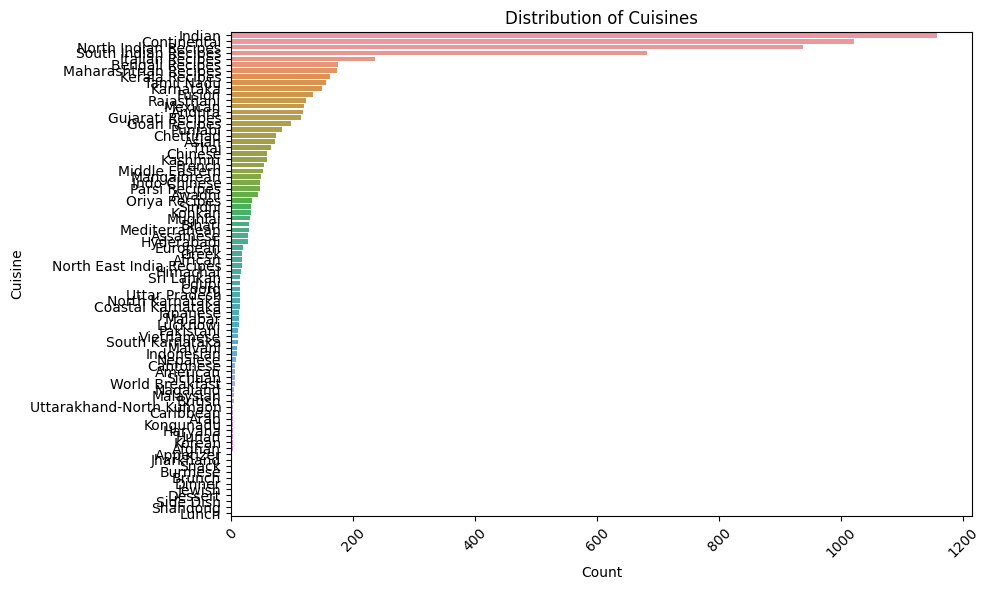

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class RecipeModelVisualization(RecipeModel):
    def plot_cuisine_distribution(self):
        # Plotting the distribution of cuisines
        plt.figure(figsize=(10, 6))
        sns.countplot(y='Cuisine', data=self.data, order=self.data['Cuisine'].value_counts().index)
        plt.title('Distribution of Cuisines')
        plt.xlabel('Count')
        plt.ylabel('Cuisine')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_course_distribution(self):
        # Plotting the distribution of courses
        plt.figure(figsize=(10, 6))
        sns.countplot(y='Course', data=self.data, order=self.data['Course'].value_counts().index)
        plt.title('Distribution of Courses')
        plt.xlabel('Count')
        plt.ylabel('Course')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Create an instance of the class and plot
recipe_viz_model = RecipeModelVisualization('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model.load_data()

# First visualization: Distribution of Cuisines
recipe_viz_model.plot_cuisine_distribution()

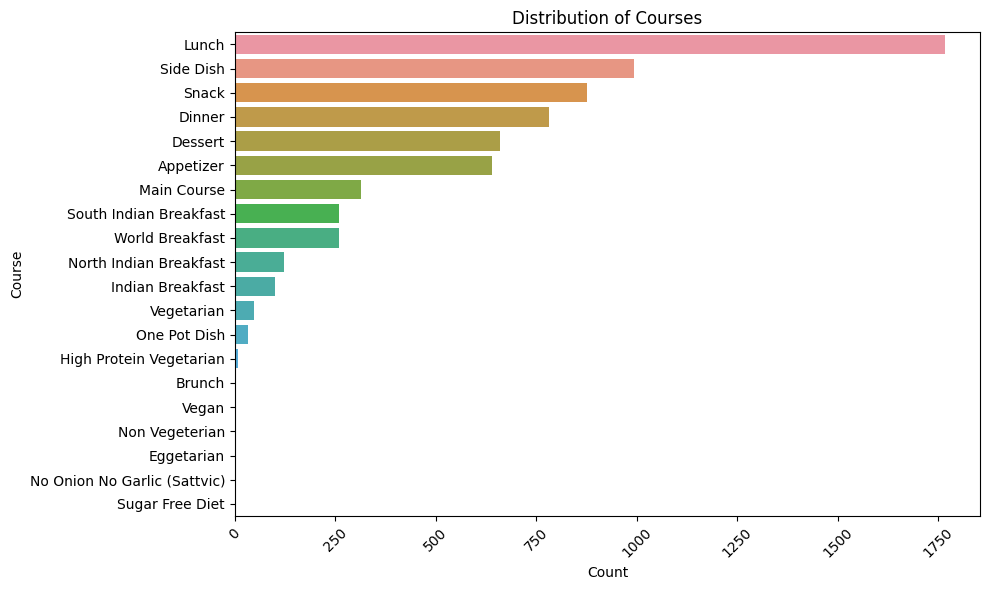

In [ ]:
# Second visualization: Distribution of Courses
recipe_viz_model.plot_course_distribution()

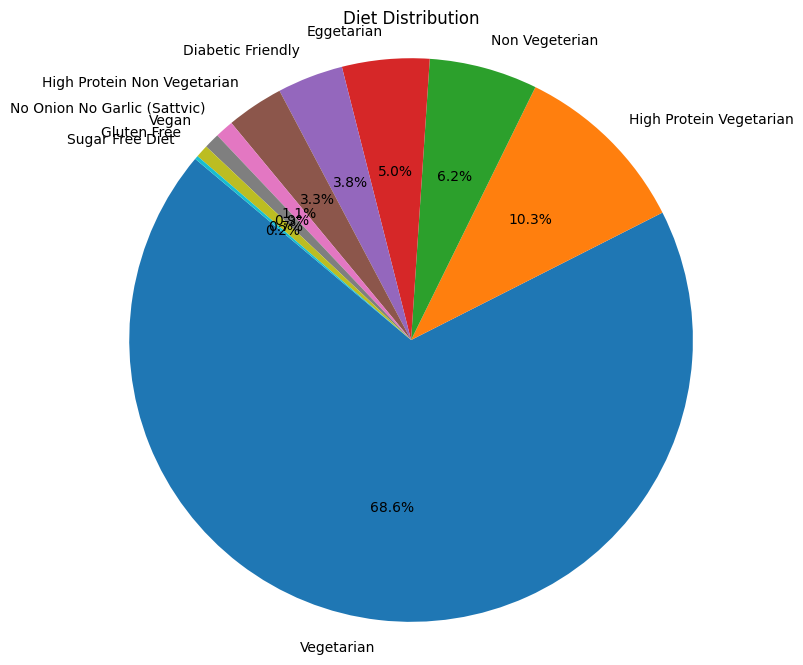

In [ ]:
class RecipeModelVisualizationExtended(RecipeModelVisualization):
    def plot_diet_distribution(self):
        # Plotting the distribution of dietary categories
        diet_counts = self.data['Diet'].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title('Diet Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

# Extend the instance and plot
recipe_viz_model_extended = RecipeModelVisualizationExtended('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_extended.load_data()

# Third visualization: Diet Distribution
recipe_viz_model_extended.plot_diet_distribution()


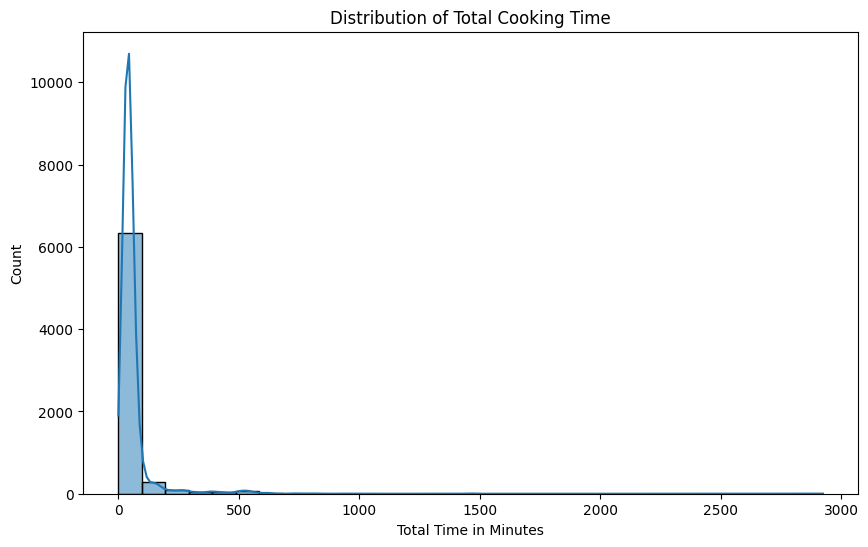

In [ ]:
class RecipeModelVisualizationMore(RecipeModelVisualizationExtended):
    def plot_total_time_distribution(self):
        # Plotting the distribution of total cooking time
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['TotalTimeInMins'], bins=30, kde=True)
        plt.title('Distribution of Total Cooking Time')
        plt.xlabel('Total Time in Minutes')
        plt.ylabel('Count')
        plt.show()

# Extend the instance and plot
recipe_viz_model_more = RecipeModelVisualizationMore('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_more.load_data()

# Fourth visualization: Total Cooking Time Distribution
recipe_viz_model_more.plot_total_time_distribution()


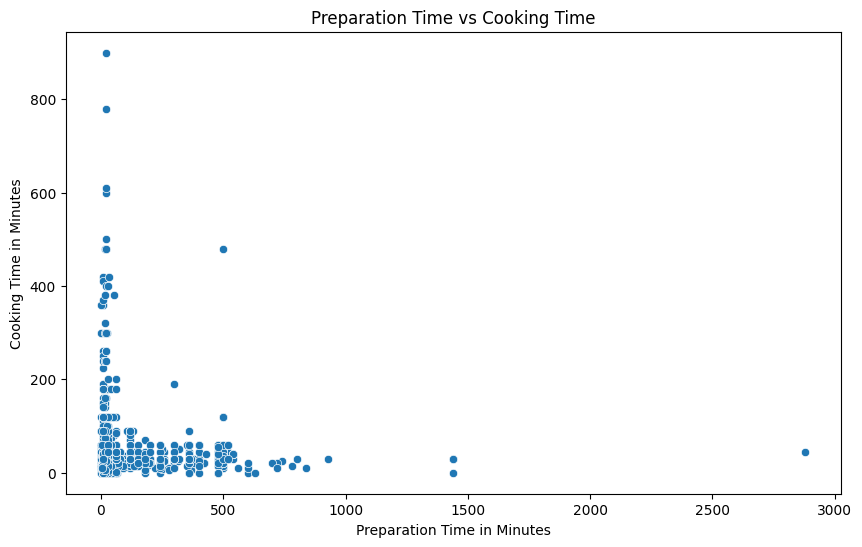

In [ ]:
class RecipeModelVisualizationScatter(RecipeModelVisualizationMore):
    def plot_prep_vs_cook_time(self):
        # Plotting the relationship between preparation time and cooking time
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='PrepTimeInMins', y='CookTimeInMins', data=self.data)
        plt.title('Preparation Time vs Cooking Time')
        plt.xlabel('Preparation Time in Minutes')
        plt.ylabel('Cooking Time in Minutes')
        plt.show()

# Extend the instance and plot
recipe_viz_model_scatter = RecipeModelVisualizationScatter('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_scatter.load_data()

# Fifth visualization: Preparation Time vs Cooking Time
recipe_viz_model_scatter.plot_prep_vs_cook_time()


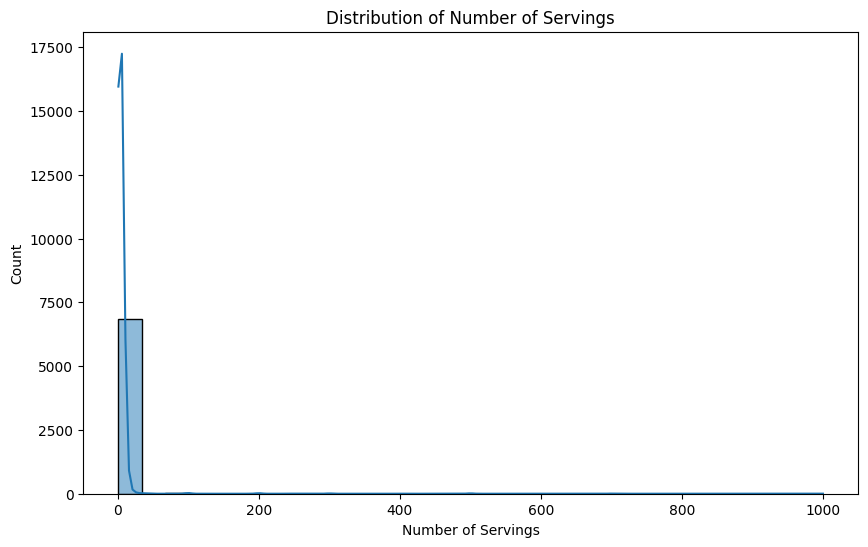

In [ ]:
# Redefining the necessary classes for visualization
class RecipeModel:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        return self.data.head()

class RecipeModelVisualization(RecipeModel):
    def plot_servings_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['Servings'], bins=30, kde=True)
        plt.title('Distribution of Number of Servings')
        plt.xlabel('Number of Servings')
        plt.ylabel('Count')
        plt.show()

# Initialize the class with the new dataset
recipe_viz_model_new = RecipeModelVisualization('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_new.load_data()

# Sixth visualization with the new dataset: Distribution of Number of Servings
recipe_viz_model_new.plot_servings_distribution()


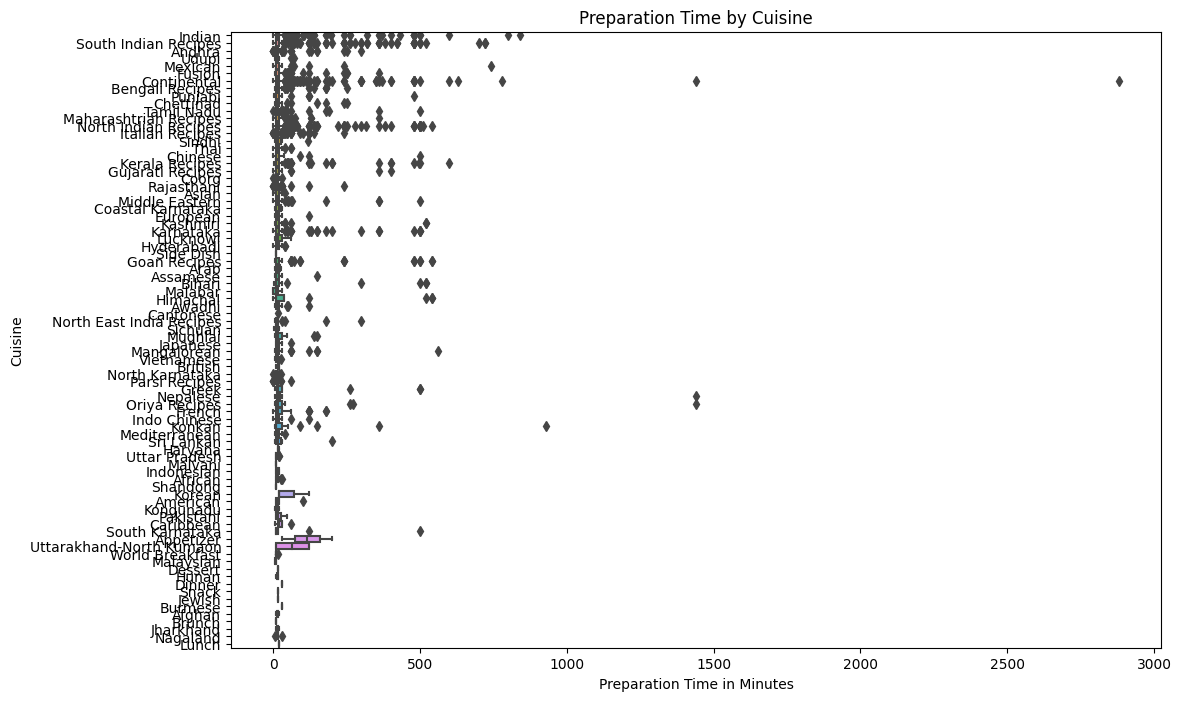

In [ ]:
class RecipeModelVisualizationBoxPlot(RecipeModelVisualization):
    def plot_prep_time_by_cuisine(self):
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='PrepTimeInMins', y='Cuisine', data=self.data)
        plt.title('Preparation Time by Cuisine')
        plt.xlabel('Preparation Time in Minutes')
        plt.ylabel('Cuisine')
        plt.show()

# Extend the instance and plot
recipe_viz_model_boxplot = RecipeModelVisualizationBoxPlot('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_boxplot.load_data()

# Seventh visualization: Preparation Time by Cuisine
recipe_viz_model_boxplot.plot_prep_time_by_cuisine()



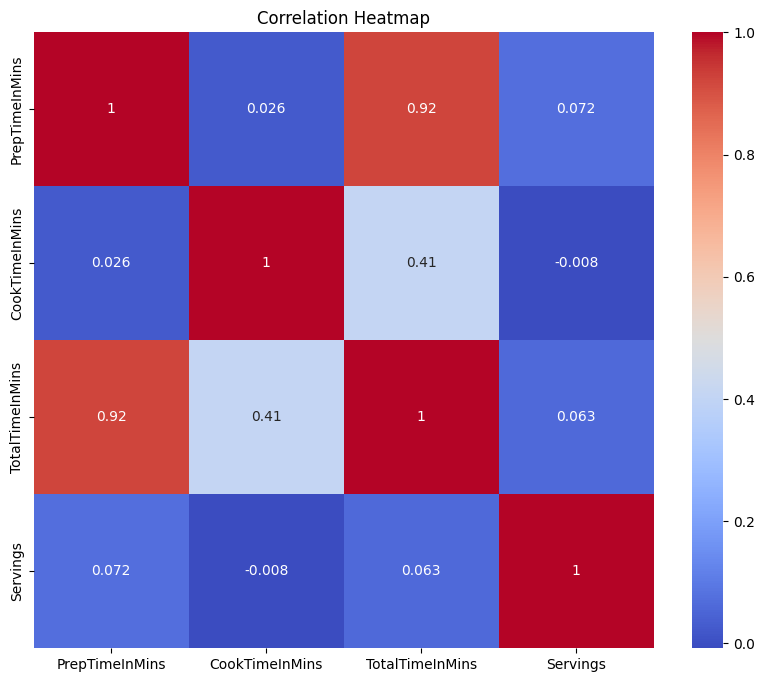

In [ ]:
class RecipeModelVisualizationHeatmap(RecipeModelVisualizationBoxPlot):
    def plot_correlation_heatmap(self):
        plt.figure(figsize=(10, 8))
        corr_matrix = self.data[['PrepTimeInMins', 'CookTimeInMins', 'TotalTimeInMins', 'Servings']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()

# Extend the instance and plot
recipe_viz_model_heatmap = RecipeModelVisualizationHeatmap('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_heatmap.load_data()

# Eighth visualization: Correlation Heatmap
recipe_viz_model_heatmap.plot_correlation_heatmap()


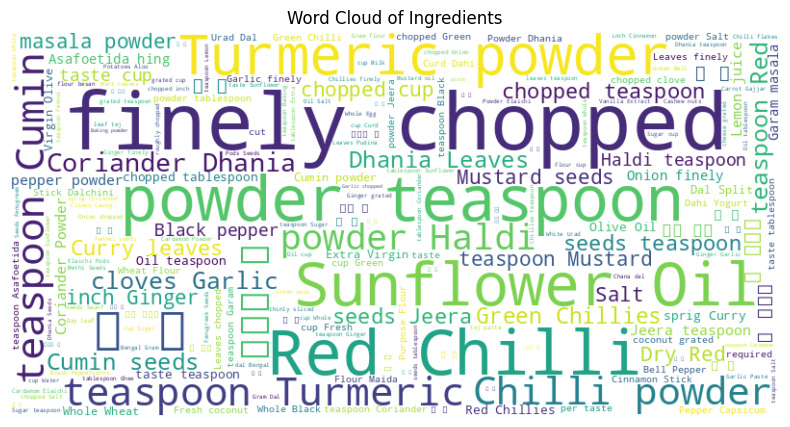

In [ ]:
from wordcloud import WordCloud

class RecipeModelVisualizationWordCloud(RecipeModel):
    def plot_ingredients_word_cloud(self):
        # Combining all ingredients into a single text string
        all_ingredients = ' '.join(self.data['TranslatedIngredients'].dropna())
        # Generating the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

        # Plotting the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Ingredients')
        plt.show()

# Create an instance of the class and load the new data
recipe_viz_model_wordcloud = RecipeModelVisualizationWordCloud('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_wordcloud.load_data()

# Ninth visualization: Word Cloud of Ingredients
recipe_viz_model_wordcloud.plot_ingredients_word_cloud()


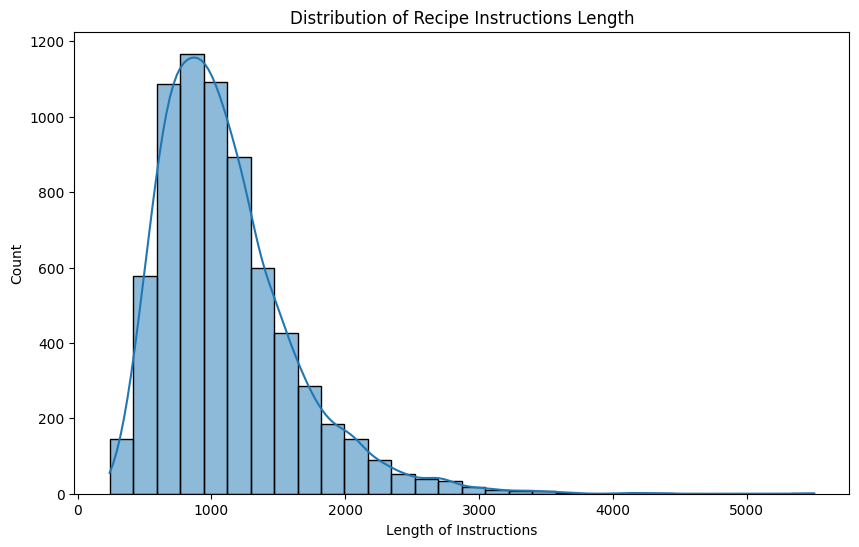

In [ ]:
class RecipeModelVisualizationTextData(RecipeModelVisualizationWordCloud):
    def plot_text_length_distribution(self):
        # Calculating the length of each recipe's instructions
        self.data['InstructionsLength'] = self.data['TranslatedInstructions'].dropna().apply(len)
        # Plotting the distribution of instruction lengths
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['InstructionsLength'], bins=30, kde=True)
        plt.title('Distribution of Recipe Instructions Length')
        plt.xlabel('Length of Instructions')
        plt.ylabel('Count')
        plt.show()

# Extend the instance and plot
recipe_viz_model_text_data = RecipeModelVisualizationTextData('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
recipe_viz_model_text_data.load_data()

# Tenth visualization (alternative): Distribution of Recipe Instructions Length
recipe_viz_model_text_data.plot_text_length_distribution()


### **Bonus Part - (We will do it in depth in Deep Learning Class) Modelling it as Sequence geneartion - receipe generation**

### ***Data Preparation***

In [ ]:
class RecipeModelDataPreparation(RecipeModel):
    def clean_and_prepare_data(self):
        # Loading and cleaning the data
        self.data = pd.read_csv(self.file_path)
        self.data['TranslatedIngredients'] = self.data['TranslatedIngredients'].str.strip().str.lower()
        self.data['TranslatedInstructions'] = self.data['TranslatedInstructions'].str.strip().str.lower()

        # Handling missing values
        self.data.dropna(subset=['TranslatedIngredients', 'TranslatedInstructions'], inplace=True)

        # Feature Selection - focusing on ingredients and instructions for recipe generation
        self.prepared_data = self.data[['TranslatedIngredients','TotalTimeInMins', 'TranslatedInstructions']]

        return self.prepared_data

# Create an instance of the class and perform data preparation
recipe_model_data_prep = RecipeModelDataPreparation('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')

# Cleaning and preparing the data
prepared_data_head = recipe_model_data_prep.clean_and_prepare_data()
prepared_data_head.head()


,TranslatedIngredients,TotalTimeInMins,TranslatedInstructions
0,"6 karela (bitter gourd/ pavakkai) - deseeded,s...",45,"to begin making the masala karela recipe,de-se..."
1,"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",15,"to make tomato puliogere, first cut the tomato..."
2,"1-1/2 cups rice vermicelli noodles (thin),1 on...",50,"to begin making the ragi vermicelli recipe, fi..."
3,"500 grams chicken,2 onion - chopped,1 tomato -...",45,to begin making gongura chicken curry recipe f...
4,"1 tablespoon chana dal, 1 tablespoon white ura...",30,"to make andhra style alam pachadi, first heat ..."


### ***Cleaning, Tokenisation and splitting the data***

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

class RecipeModelTextEncoding:
    def __init__(self, file_path, max_sequence_length=500):
        self.file_path = file_path
        self.max_sequence_length = max_sequence_length
        self.tokenizer = None

    def clean_and_prepare_data(self):
        # Load and clean the data
        self.data = pd.read_csv(self.file_path)
        self.data['TranslatedIngredients'] = self.data['TranslatedIngredients'].str.strip().str.lower()
        self.data['TranslatedInstructions'] = self.data['TranslatedInstructions'].str.strip().str.lower()

        # Handling missing values
        self.data.dropna(subset=['TranslatedIngredients', 'TranslatedInstructions'], inplace=True)

        # Selecting relevant features
        self.prepared_data = self.data[['TranslatedIngredients', 'TranslatedInstructions']]

    def tokenize_text_data(self):
        # Initializing the tokenizer for textual data
        self.tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
        self.tokenizer.fit_on_texts(self.prepared_data['TranslatedIngredients'])
        self.tokenizer.fit_on_texts(self.prepared_data['TranslatedInstructions'])

        # Tokenizing the text
        input_sequences = self.tokenizer.texts_to_sequences(self.prepared_data['TranslatedIngredients'])
        output_sequences = self.tokenizer.texts_to_sequences(self.prepared_data['TranslatedInstructions'])

        # Padding sequences
        input_padded = pad_sequences(input_sequences, maxlen=self.max_sequence_length, padding='post', truncating='post')
        output_padded = pad_sequences(output_sequences, maxlen=self.max_sequence_length, padding='post', truncating='post')

        return input_padded, output_padded

    def split_data(self, input_padded, output_padded):
        # Splitting the data into training, validation, and testing sets
        X_train, X_test, y_train, y_test = train_test_split(input_padded, output_padded, test_size=0.2)
        return X_train, X_test, y_train, y_test

# Usage
file_path = '/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv'
recipe_model_text_encoding = RecipeModelTextEncoding(file_path)
recipe_model_text_encoding.clean_and_prepare_data()

# Tokenizing and encoding the text data
input_padded, output_padded = recipe_model_text_encoding.tokenize_text_data()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = recipe_model_text_encoding.split_data(input_padded, output_padded)


In [ ]:
X_train.shape, y_train.shape

((5492, 500), (5492, 500))

### ***Model Training***

***Serious Note: Accuracy does not make sense as a metric here as we are modelling sequence generation***

In [ ]:
# Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import os
from tensorflow.keras.callbacks import TensorBoard

# Directory for TensorBoard logs
log_dir = os.path.join("logs", "fit", "recipe_model")
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


vocab_size = len(recipe_model_text_encoding.tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=recipe_model_text_encoding.max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(vocab_size, activation=None))  # Logits for each word in the vocabulary

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model training with integer sequences as target data
# Model training with TensorBoard callback
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])
# Directory for saving models
model_dir = os.path.join("saved_models", "recipe_model")
os.makedirs(model_dir, exist_ok=True)
model_save_path = os.path.join(model_dir, "recipe_model.h5")

# Save the model
model.save(model_save_path)

Epoch 1/10
172/172 [==============================] - 1713s 10s/step - loss: 10.2980 - accuracy: 0.0056 - val_loss: 9.8930 - val_accuracy: 0.0088
Epoch 2/10
172/172 [==============================] - 1706s 10s/step - loss: 9.9192 - accuracy: 0.0061 - val_loss: 9.9132 - val_accuracy: 0.0028
Epoch 3/10
172/172 [==============================] - 1720s 10s/step - loss: 9.9116 - accuracy: 0.0043 - val_loss: 9.9116 - val_accuracy: 0.0054
Epoch 4/10
172/172 [==============================] - 1737s 10s/step - loss: 9.9145 - accuracy: 0.0060 - val_loss: 9.9267 - val_accuracy: 0.0052
Epoch 5/10
172/172 [==============================] - 1727s 10s/step - loss: 9.9447 - accuracy: 0.0057 - val_loss: 9.9310 - val_accuracy: 0.0068
Epoch 6/10
172/172 [==============================] - 1696s 10s/step - loss: 9.9435 - accuracy: 0.0062 - val_loss: 9.9471 - val_accuracy: 0.0062
Epoch 7/10
172/172 [==============================] - 1699s 10s/step - loss: 9.9646 - accuracy: 0.0057 - val_loss: 9.9611 - val_a

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
